<a href="https://colab.research.google.com/github/mattbobea/Data_Science/blob/main/Chapter_2A_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01 MNIST Classification

In [ ]:
import torchvision.datasets as datasets

In [ ]:
mnist_train_set = datasets.MNIST(root='./mnist_training', train=True, download=True, transform=None)
mnist_test_set = datasets.MNIST(root='./mnist_testing', train=False, download=True, transform=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_training/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_training/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_training/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_training/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_training/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_training/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_training/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_training/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist_testing/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_testing/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist_testing/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_testing/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist_testing/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_testing/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist_testing/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_testing/MNIST/raw



In [ ]:
mnist_train_set

In [ ]:
mnist_train_set.data.size()

torch.Size([60000, 28, 28])

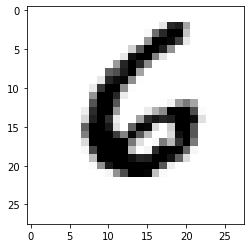

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mnist_train_set.data[90], cmap=plt.cm.binary)

In [ ]:
mnist_train_set.data[0].numpy().reshape(-1,28*28)[0][0].astype('float32')

0.0

In [ ]:
train_x = mnist_train_set.data.numpy().reshape(-1,28*28).astype('float32')
train_y = mnist_train_set.targets.numpy()

test_x = mnist_test_set.data.numpy().reshape(-1,28*28).astype('float32')
test_y = mnist_test_set.targets.numpy()

In [ ]:
from sklearn import svm

train_size = 300

classifier = svm.SVC(gamma='scale', C=1.0, kernel='linear')
classifier.fit(train_x[:train_size], train_y[:train_size])

SVC(kernel='linear')

In [ ]:
test_y

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
pred_y = classifier.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.8196

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

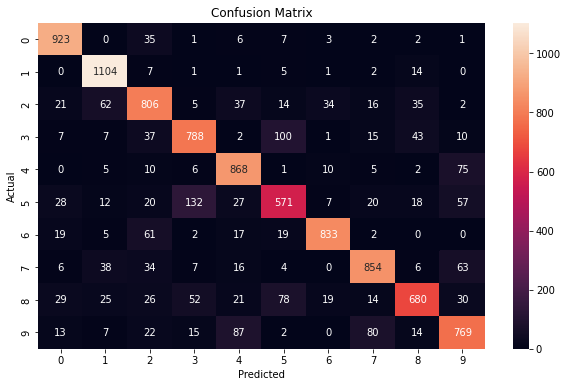

In [ ]:
cm = confusion_matrix(test_y, pred_y)

plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 02 IRIS Classification

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
x = iris['data']
y = iris['target']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
classifier = svm.SVC(gamma='scale', C=1.0, kernel='linear')
classifier.fit(train_x, train_y)

SVC(kernel='linear')

In [ ]:
pred_y = classifier.predict(test_x)

In [ ]:
accuracy_score(test_y, pred_y)

1.0

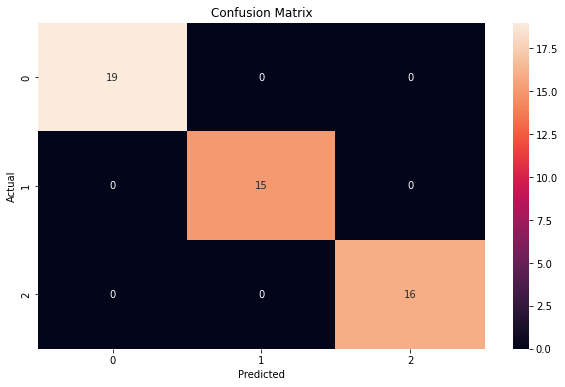

In [ ]:
cm = confusion_matrix(test_y, pred_y)

plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### L1 Distances

Text(0.5, 0.98, 'Distance:24126')

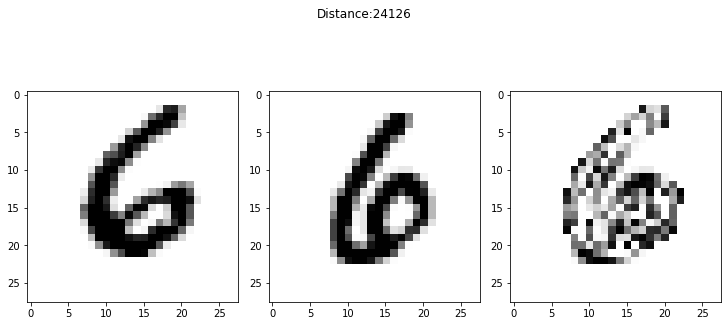

In [ ]:
import numpy as np

image_1 = mnist_train_set.data[90]
image_2 = mnist_train_set.data[93]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, constrained_layout=True, figsize=(10, 5))

ax0.imshow(image_1, cmap=plt.cm.binary)
ax1.imshow(image_2, cmap=plt.cm.binary)
ax2.imshow(image_2-image_1, cmap=plt.cm.binary)

l1_distance = np.sum(np.abs(image_2-image_1).numpy())
plt.suptitle("Distance:" + str(l1_distance))

In [ ]:
image_2[10]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,  75, 122, 230, 252, 252, 252,
        253, 252, 252, 252, 252, 252, 252, 239,  56,   0,   0,   0,   0,   0],
       dtype=torch.uint8)

In [ ]:
image_1[10]

tensor([  0,   0,   0,   0,   0,   0,   0,   0,  21, 201, 253, 253, 114,   3,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=torch.uint8)

In [ ]:
np.sum((image_2[10] - image_1[10]).numpy())

3166

### Linear Classifier

In [ ]:
w = np.array([[0.2, -0.5, 0.1, 2.0],
              [1.5, 1.3, 2.1, 0.0],
              [0, 0.25, 0.2, -0.3]])

x = np.array([56, 231, 24, 2])
bias = np.array([1.1, 3.2, -1.2])

In [ ]:
np.add(np.matmul(w, x), bias)

array([-96.8 , 437.9 ,  60.75])

### Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=10)


decision_tree = decision_tree.fit(train_x, train_y)
# r = export_text(decision_tree, feature_names=iris['feature_names'])
# print(r)


In [ ]:
pred_dt_y = decision_tree.predict(test_x)

In [ ]:
accuracy_score(test_y, pred_dt_y)

0.96